In [2]:
# Importações de Bibliotecas Necessárias
import pandas as pd
import numpy as np
import time

from datetime import datetime
from datetime import timedelta  

from random import seed
from random import randint
from random import uniform

from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.dates as md

In [3]:
# Importa dataset de climas para cada regiao

print("Reading CSV...")
weather_df = pd.read_csv('weather_description.csv')

print("Done!")
weather_df

Reading CSV...
Done!


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,broken clouds,NaN,light rain,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,broken clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,broken clouds,NaN,overcast clouds,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,scattered clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,broken clouds,NaN,broken clouds,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,few clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,broken clouds,NaN,broken clouds,sky is clear,broken clouds,sky is clear,broken clouds,overcast clouds,...,few clouds,NaN,few clouds,few clouds,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rain_values = [
"drizzle","fog","freezing rain","heavy intensity drizzle","heavy intensity rain","heavy intensity shower rain",
"heavy shower snow","heavy snow","heavy thunderstorm","light intensity drizzle","light intensity drizzle rain",
"light intensity shower rain","light rain","light rain and snow","light shower sleet","light shower snow",
"light snow","moderate rain","proximity moderate rain","proximity shower rain","proximity thunderstorm",
"proximity thunderstorm with drizzle","proximity thunderstorm with rain","ragged shower rain",
"ragged thunderstorm","rain and snow","shower drizzle","shower rain","shower snow","sleet","snow","squalls",
"thunderstorm","thunderstorm with drizzle","thunderstorm with heavy drizzle","thunderstorm with heavy rain",
"thunderstorm with light drizzle","thunderstorm with light rain","thunderstorm with rain","very heavy rain"
]

In [7]:
cols = weather_df.columns
cols

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')

In [10]:
for col in cols:
    print(col)
    if (col != 'datetime'):
        weather_df[col] = weather_df.apply((lambda x : 1 if x[col] in rain_values else 0),axis=1)
print("DONE")

datetime
Vancouver
Portland
San Francisco
Seattle
Los Angeles
San Diego
Las Vegas
Phoenix
Albuquerque
Denver
San Antonio
Dallas
Houston
Kansas City
Minneapolis
Saint Louis
Chicago
Nashville
Indianapolis
Atlanta
Detroit
Jacksonville
Charlotte
Miami
Pittsburgh
Toronto
Philadelphia
New York
Montreal
Boston
Beersheba
Tel Aviv District
Eilat
Haifa
Nahariyya
Jerusalem
DONE


In [11]:
weather_df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-10-01 13:00:00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-10-01 14:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-10-01 15:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-10-01 16:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45249,2017-11-29 21:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45250,2017-11-29 22:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45251,2017-11-29 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df2 = weather_df.copy()
total = len(df2)

df2 = df2.sum().reset_index()
df2.columns = ['city','total rain hours']
df2 = df2[1:len(df2)-1]
df2

,city,total rain hours
1,Vancouver,12620
2,Portland,11949
3,San Francisco,6477
4,Seattle,12193
5,Los Angeles,3329
6,San Diego,4159
7,Las Vegas,2360
8,Phoenix,2645
9,Albuquerque,4171
10,Denver,7414


Setting Query for Specific Day and Month...


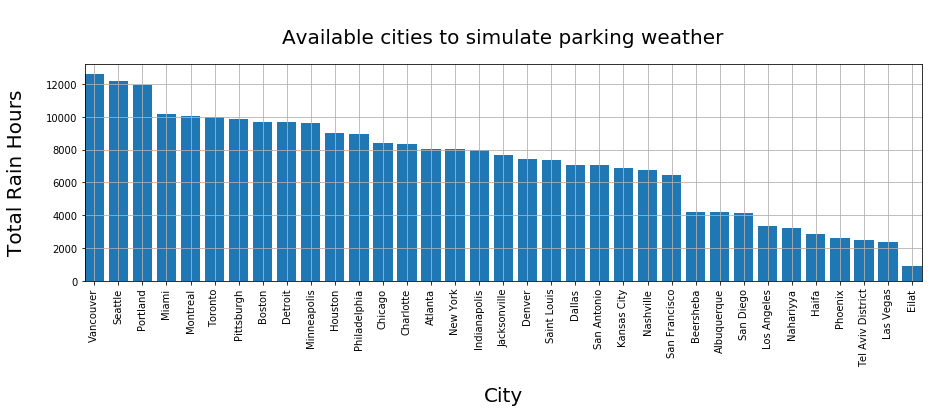

In [35]:
df2 = df2.sort_values(['total rain hours'], ascending=False)

# Query For Specific Day
print("Setting Query for Specific Day and Month...")

plt.subplots(figsize=(15,4))
plt.grid()
plt.locator_params(axis='x', nbins=24)
plt.bar(df2['city'],df2['total rain hours'])

plt.title("\nAvailable cities to simulate parking weather", fontsize=20, pad=20)
plt.xlabel("City", fontsize=20, labelpad=20)
plt.ylabel("Total Rain Hours", fontsize=20, labelpad=20)
plt.xticks(rotation=90)
plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.show()